# Lasso Regression

In [1]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split


In [2]:
insurance=pd.read_csv("insurance.csv")
X=insurance.drop(columns="charges")
y=insurance["charges"]

X=pd.get_dummies(X,columns=["region"],drop_first=True,dtype=int)
X["sex"]=X["sex"].map({"female":0,"male":1})
X["smoker"]=X["smoker"].map({"yes":1,"no":0})

X["age_smoker"]=X["age"]*X["smoker"]
X["bmi_smoker"]=X["bmi"]*X["smoker"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


MSE of alpha 0.001:-  20922599.871035967
MSE of alpha 0.1:-  20921803.698431373
MSE of alpha 1:-  20914832.63508914
MSE of alpha 2:-  20908106.77995452
MSE of alpha 10:-  20872844.79479669
MSE of alpha 20:-  20877828.532378834
MSE of alpha 30:-  20937537.133939777
MSE of alpha 40:-  21046489.29389078
MSE of alpha 50:-  21196929.86960891
MSE of alpha 100:-  22423172.68602325


<Axes: >

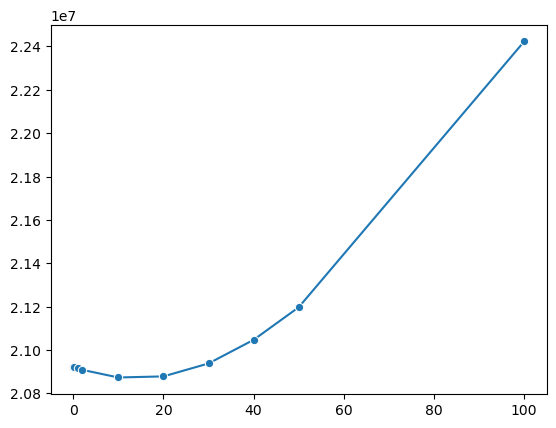

In [3]:
import seaborn as sns
aplhas=[0.001,0.1,1,2,10,20,30,40,50,100]
mses=[]

for a in aplhas:
    Lasso_model=Lasso(a)
    Lasso_model.fit(X_train,y_train)
    
    y_pred=Lasso_model.predict(X_test)
    mse=mean_squared_error(y_test,y_pred)
    
    print(f"MSE of alpha {a}:- ",mse)
    mses.append(mse)

sns.lineplot(x=aplhas,y=mses,marker="o")

In [8]:
# Lasso Cv

from sklearn.linear_model import LassoCV
a=[0.001,0.1,1,2,10,20,30,40,50,100]

Lasso_cv_model=LassoCV(
    alphas=a,
    cv=5,
    max_iter=1000,
    random_state=42
)
Lasso_cv_model.fit(X_train,y_train)
    
print(f"best_alpha:- ",Lasso_cv_model.alpha_) 
y_pred=Lasso_cv_model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)

r2=r2_score(y_test,y_pred)
print(f"mse:- ",mse) 
print(f"r2:- ",r2) 

    



best_alpha:-  0.001
mse:-  20922599.871035967
r2:-  0.8652317499151699
